In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Project Overview:

# Here is the question you are trying to solve while working on this case study:
# Which borough of London has seen the greatest average increase in housing prices over the (approximately) 
# two decades covered by the dataset?

# Context:
# A borough is just a fancy word for district. There are 32 London boroughs within GreaterLondon, and each borough has its 
# own governing council. As you can guess, some of them are more desirable to live in and will reflect that desirability in 
# a greater rise in housing prices. 

In [101]:
import_file = 'Downloads/UK House price index.xlsx'
properties = pd.read_excel(import_file, sheet_name='Average price', index_col= None)

In [103]:
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,NaN,53202.77128
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,NaN,53096.1549
3,1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,...,44434.8681,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,NaN,53201.2843
4,1995-04-01,77101.20804,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,...,44267.7796,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,NaN,53590.8548


In [8]:
properties.shape

(343, 49)

In [9]:
properties_T = properties.T

In [10]:
properties_T.head()

,0,1,2,3,4,5,6,7,8,9,...,333,334,335,336,337,338,339,340,341,342
Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,...,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00
City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,104473.1096,...,892558,911172,952194,953962,975524,859323,910666,908299,978395,1001644
Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,51471.61353,...,347323,350138,353968,356131,352116,344414,343709,350872,353925,347148
Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,93273.12245,...,602339,599296,593031,593804,597651,601278,593957,586289,575131,574285
Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,64509.54767,...,406183,410677,409367,408708,401081,400870,399844,402319,398450,396025


In [11]:
properties_T.index

Index(['Unnamed: 0', 'City of London', 'Barking & Dagenham', 'Barnet',
       'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow',
       'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark',
       'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
       'Westminster', 'Unnamed: 34', 'Inner London', 'Outer London',
       'Unnamed: 37', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'Unnamed: 47', 'England'],
      dtype='object')

In [12]:
properties_T = properties_T.reset_index()

In [13]:
properties_T.index

RangeIndex(start=0, stop=49, step=1)

In [14]:
properties_T.head()

,index,0,1,2,3,4,5,6,7,8,...,333,334,335,336,337,338,339,340,341,342
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,892558,911172,952194,953962,975524,859323,910666,908299,978395,1001644
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,347323,350138,353968,356131,352116,344414,343709,350872,353925,347148
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,602339,599296,593031,593804,597651,601278,593957,586289,575131,574285
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,406183,410677,409367,408708,401081,400870,399844,402319,398450,396025


In [15]:
# To confirm that our DataFrame's columns are mainly just integers, call the .columns feature on our DataFrame:
properties_T.columns

Index(['index',       0,       1,       2,       3,       4,       5,       6,
             7,       8,
       ...
           333,     334,     335,     336,     337,     338,     339,     340,
           341,     342],
      dtype='object', length=344)

In [16]:
# Call the iloc[] method with double square brackets on the properties_T DataFrame, to see the row at index 0. 
properties_T.iloc[[0]]

,index,0,1,2,3,4,5,6,7,8,...,333,334,335,336,337,338,339,340,341,342
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00


In [17]:
properties_T.columns = properties_T.iloc[0]

In [18]:
properties_T.head()

,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,892558,911172,952194,953962,975524,859323,910666,908299,978395,1001644
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,347323,350138,353968,356131,352116,344414,343709,350872,353925,347148
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,602339,599296,593031,593804,597651,601278,593957,586289,575131,574285
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,406183,410677,409367,408708,401081,400870,399844,402319,398450,396025


In [19]:
properties_T = properties_T.drop(0)

In [20]:
properties_T.head()

,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,892558,911172,952194,953962,975524,859323,910666,908299,978395,1001644
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,347323,350138,353968,356131,352116,344414,343709,350872,353925,347148
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,602339,599296,593031,593804,597651,601278,593957,586289,575131,574285
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,406183,410677,409367,408708,401081,400870,399844,402319,398450,396025
5,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,577581,569656,564091,553092,549679,535593,529308,532286,531523,541559


In [70]:
properties_T = properties_T.rename(columns = {'Unnamed: 0':'London_Borough', pd.NaT: 'ID'})

In [72]:
properties_T.head()

,London_Burough,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,892558,911172,952194,953962,975524,859323,910666,908299,978395,1001644
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,347323,350138,353968,356131,352116,344414,343709,350872,353925,347148
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,602339,599296,593031,593804,597651,601278,593957,586289,575131,574285
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,406183,410677,409367,408708,401081,400870,399844,402319,398450,396025
5,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,577581,569656,564091,553092,549679,535593,529308,532286,531523,541559


In [23]:
properties_T.columns

Index([   'London_Burough',                'ID', 1995-01-01 00:00:00,
       1995-02-01 00:00:00, 1995-03-01 00:00:00, 1995-04-01 00:00:00,
       1995-05-01 00:00:00, 1995-06-01 00:00:00, 1995-07-01 00:00:00,
       1995-08-01 00:00:00,
       ...
       2022-09-01 00:00:00, 2022-10-01 00:00:00, 2022-11-01 00:00:00,
       2022-12-01 00:00:00, 2023-01-01 00:00:00, 2023-02-01 00:00:00,
       2023-03-01 00:00:00, 2023-04-01 00:00:00, 2023-05-01 00:00:00,
       2023-06-01 00:00:00],
      dtype='object', name=0, length=344)

In [73]:
clean_properties = pd.melt(properties_T, id_vars = ['London_Borough', 'ID'])

KeyError: "The following 'id_vars' are not present in the DataFrame: ['London_Borough']"

In [25]:
clean_properties.head()

,London_Burough,ID,0,value
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.2266
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698


In [26]:
clean_properties = clean_properties.rename(columns = {0: 'Month', 'value': 'Average_price'})

In [27]:
clean_properties.head()

,London_Burough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.2266
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698


In [28]:
clean_properties.dtypes

London_Burough            object
ID                        object
Month             datetime64[ns]
Average_price             object
dtype: object

In [29]:
clean_properties['Average_price'] = pd.to_numeric(clean_properties['Average_price'])

In [30]:
clean_properties.dtypes

London_Burough            object
ID                        object
Month             datetime64[ns]
Average_price            float64
dtype: object

In [31]:
clean_properties.count()

London_Burough    16416
ID                15390
Month             16416
Average_price     15390
dtype: int64

In [32]:
clean_properties['London_Burough'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Unnamed: 34',
       'Inner London', 'Outer London', 'Unnamed: 37', 'NORTH EAST',
       'NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS',
       'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST',
       'SOUTH WEST', 'Unnamed: 47', 'England'], dtype=object)

In [33]:
clean_properties[clean_properties['London_Burough'] == 'Unnamed: 34'].head()

,London_Burough,ID,Month,Average_price
33,Unnamed: 34,NaN,1995-01-01,NaN
81,Unnamed: 34,NaN,1995-02-01,NaN
129,Unnamed: 34,NaN,1995-03-01,NaN
177,Unnamed: 34,NaN,1995-04-01,NaN
225,Unnamed: 34,NaN,1995-05-01,NaN


In [34]:
clean_properties[clean_properties['London_Burough'] == 'Unnamed: 37'].head()

,London_Burough,ID,Month,Average_price
36,Unnamed: 37,NaN,1995-01-01,NaN
84,Unnamed: 37,NaN,1995-02-01,NaN
132,Unnamed: 37,NaN,1995-03-01,NaN
180,Unnamed: 37,NaN,1995-04-01,NaN
228,Unnamed: 37,NaN,1995-05-01,NaN


In [35]:
clean_properties[clean_properties['ID'].isna()]

,London_Burough,ID,Month,Average_price
33,Unnamed: 34,NaN,1995-01-01,NaN
36,Unnamed: 37,NaN,1995-01-01,NaN
46,Unnamed: 47,NaN,1995-01-01,NaN
81,Unnamed: 34,NaN,1995-02-01,NaN
84,Unnamed: 37,NaN,1995-02-01,NaN
...,...,...,...,...
16356,Unnamed: 37,NaN,2023-05-01,NaN
16366,Unnamed: 47,NaN,2023-05-01,NaN
16401,Unnamed: 34,NaN,2023-06-01,NaN
16404,Unnamed: 37,NaN,2023-06-01,NaN


In [36]:
NaNFreeDF1 = clean_properties[clean_properties['Average_price'].notna()]
NaNFreeDF1.head(48)

,London_Burough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698
5,Bromley,E09000006,1995-01-01,81671.47692
6,Camden,E09000007,1995-01-01,120932.88810
7,Croydon,E09000008,1995-01-01,69158.16225
8,Ealing,E09000009,1995-01-01,79885.89069
9,Enfield,E09000010,1995-01-01,72514.69096


In [37]:
NaNFreeDF1.count()

London_Burough    15390
ID                15390
Month             15390
Average_price     15390
dtype: int64

In [38]:
NaNFreeDF2 = clean_properties.dropna()
NaNFreeDF2.head(48)

,London_Burough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698
5,Bromley,E09000006,1995-01-01,81671.47692
6,Camden,E09000007,1995-01-01,120932.88810
7,Croydon,E09000008,1995-01-01,69158.16225
8,Ealing,E09000009,1995-01-01,79885.89069
9,Enfield,E09000010,1995-01-01,72514.69096


In [39]:
NaNFreeDF2.count()

London_Burough    15390
ID                15390
Month             15390
Average_price     15390
dtype: int64

In [40]:
NaNFreeDF2['London_Burough'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Inner London',
       'Outer London', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'England'], dtype=object)

In [41]:
print(clean_properties.shape)
print(NaNFreeDF1.shape)
print(NaNFreeDF2.shape)

(16416, 4)
(15390, 4)
(15390, 4)


In [42]:
nonBuroughs = ['Inner London', 'Outer London', 
               'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER', 
               'EAST MIDLANDS', 'WEST MIDLANDS',
              'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST', 
              'SOUTH WEST', 'England']

In [43]:
NaNFreeDF2[NaNFreeDF2.London_Burough.isin(nonBuroughs)]

,London_Burough,ID,Month,Average_price
34,Inner London,E13000001,1995-01-01,78251.97650
35,Outer London,E13000002,1995-01-01,72958.79836
37,NORTH EAST,E12000001,1995-01-01,42076.35411
38,NORTH WEST,E12000002,1995-01-01,43958.48001
39,YORKS & THE HUMBER,E12000003,1995-01-01,44803.42878
...,...,...,...,...
16410,EAST OF ENGLAND,E12000006,2023-06-01,351213.00000
16411,LONDON,E12000007,2023-06-01,527979.00000
16412,SOUTH EAST,E12000008,2023-06-01,391406.00000
16413,SOUTH WEST,E12000009,2023-06-01,321152.00000


In [44]:
NaNFreeDF2[~NaNFreeDF2.London_Burough.isin(nonBuroughs)]

,London_Burough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698
...,...,...,...,...
16396,Sutton,E09000029,2023-06-01,433241.00000
16397,Tower Hamlets,E09000030,2023-06-01,485790.00000
16398,Waltham Forest,E09000031,2023-06-01,506476.00000
16399,Wandsworth,E09000032,2023-06-01,619255.00000


In [45]:
NaNFreeDF2 = NaNFreeDF2[~NaNFreeDF2.London_Burough.isin(nonBuroughs)]

In [46]:
NaNFreeDF2.head()

,London_Burough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698


In [47]:
df = NaNFreeDF2

In [48]:
df.head()

,London_Burough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698


In [49]:
df.dtypes

London_Burough            object
ID                        object
Month             datetime64[ns]
Average_price            float64
dtype: object

Text(0, 0.5, 'Price')

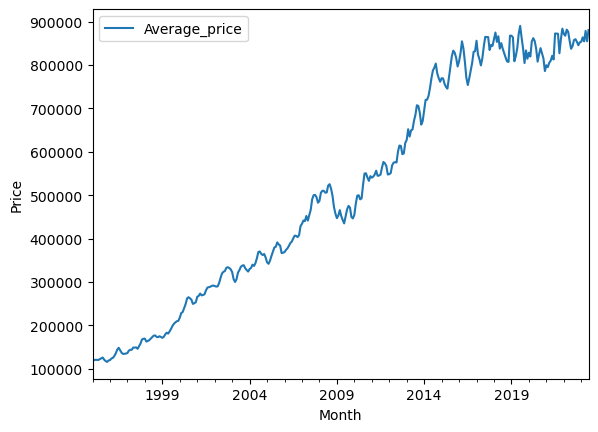

In [50]:
camden_prices = df[df['London_Burough'] == 'Camden'] 

ax = camden_prices.plot(kind='line', x='Month', y='Average_price')

ax.set_ylabel('Price')

In [54]:
df['Year'] = df['Month'].apply(lambda t: t.year)

df.tail()

,London_Burough,ID,Month,Average_price,Year
16396,Sutton,E09000029,2023-06-01,433241.0,2023
16397,Tower Hamlets,E09000030,2023-06-01,485790.0,2023
16398,Waltham Forest,E09000031,2023-06-01,506476.0,2023
16399,Wandsworth,E09000032,2023-06-01,619255.0,2023
16400,Westminster,E09000033,2023-06-01,996153.0,2023


In [58]:
dfg = df.groupby(by=['London_Burough', 'Year']).mean()
dfg.sample(10)

/tmp/ipykernel_64150/1784000808.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfg = df.groupby(by=['London_Burough', 'Year']).mean()


Average_price
London_Burough       Year               
Barnet               2013  374770.610075
City of London       2016  818315.551142
                     2012  525327.551258
Haringey             2023  601280.166667
                     2010  314479.843742
Hillingdon           2004  215696.088150
Richmond upon Thames 1997  136656.271017
Redbridge            2010  252334.424742
Lambeth              1996   72444.213648
Barking & Dagenham   2023  348697.333333

In [59]:
dfg = dfg.reset_index()
dfg.head()

,London_Burough,Year,Average_price
0,Barking & Dagenham,1995,51817.969390
1,Barking & Dagenham,1996,51718.192690
2,Barking & Dagenham,1997,55974.262309
3,Barking & Dagenham,1998,60285.821083
4,Barking & Dagenham,1999,65320.934441


In [95]:
def create_price_ratio(d):
    y1998 = float(d['Average_price'][d['Year']==1998])
    y2018 = float(d['Average_price'][d['Year']==2018])
    ratio = [y2018/y1998]
    return ratio


In [96]:
create_price_ratio(dfg[dfg['London_Burough']=='Barking & Dagenham'])

[4.89661861291754]

In [97]:
dfg.columns

Index(['London_Burough', 'Year', 'Average_price'], dtype='object')

In [98]:
final = {}

In [99]:
for b in dfg['London_Burough'].unique():
    borough = dfg[dfg['London_Burough']==b]
    final[b] = create_price_ratio(borough)
    
print(final)

{'Barking & Dagenham': [4.89661861291754], 'Barnet': [4.358195917538044], 'Bexley': [4.248977046127877], 'Brent': [4.8945544971392865], 'Bromley': [4.094784685333876], 'Camden': [4.935353408884261], 'City of London': [5.30162037758761], 'Croydon': [4.201100280024766], 'Ealing': [4.311450902121834], 'Enfield': [4.263471583495811], 'Greenwich': [4.7630363473291935], 'Hackney': [6.198285561008663], 'Hammersmith & Fulham': [4.13779810193623], 'Haringey': [5.134624964136042], 'Harrow': [4.0591964329643195], 'Havering': [4.325230371335307], 'Hillingdon': [4.2002730803844575], 'Hounslow': [3.976409106143329], 'Islington': [4.844048012802297], 'Kensington & Chelsea': [5.082465066092464], 'Kingston upon Thames': [4.270549521484271], 'Lambeth': [4.957751163514062], 'Lewisham': [5.449221041059686], 'Merton': [4.741273313294603], 'Newham': [5.305390437201879], 'Redbridge': [4.471182006097364], 'Richmond upon Thames': [4.005161895721457], 'Southwark': [5.516485302379378], 'Sutton': [4.1185226085731

In [100]:
df_ratios = pd.DataFrame(final)

In [104]:
df_ratios.head()

,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
0,4.896619,4.358196,4.248977,4.894554,4.094785,4.935353,5.30162,4.2011,4.311451,4.263472,...,4.741273,5.30539,4.471182,4.005162,5.516485,4.118523,4.626701,5.834756,4.757709,5.353565


In [107]:
df_ratios_T = df_ratios.T
df_ratios = df_ratios_T.reset_index()
df_ratios.head()

,index,0
0,Barking & Dagenham,4.896619
1,Barnet,4.358196
2,Bexley,4.248977
3,Brent,4.894554
4,Bromley,4.094785


In [108]:
df_ratios.rename(columns={'index':'Borough', 0:'2018'}, inplace=True)
df_ratios.head()

,Borough,2018
0,Barking & Dagenham,4.896619
1,Barnet,4.358196
2,Bexley,4.248977
3,Brent,4.894554
4,Bromley,4.094785


In [109]:
top15 = df_ratios.sort_values(by='2018', ascending=False).head(15)
print(top15)

                 Borough      2018
11               Hackney  6.198286
30        Waltham Forest  5.834756
27             Southwark  5.516485
22              Lewisham  5.449221
32           Westminster  5.353565
24                Newham  5.305390
6         City of London  5.301620
13              Haringey  5.134625
19  Kensington & Chelsea  5.082465
21               Lambeth  4.957751
5                 Camden  4.935353
0     Barking & Dagenham  4.896619
3                  Brent  4.894554
18             Islington  4.844048
10             Greenwich  4.763036


[Text(0, 0, 'Hackney'),
 Text(1, 0, 'Waltham Forest'),
 Text(2, 0, 'Southwark'),
 Text(3, 0, 'Lewisham'),
 Text(4, 0, 'Westminster'),
 Text(5, 0, 'Newham'),
 Text(6, 0, 'City of London'),
 Text(7, 0, 'Haringey'),
 Text(8, 0, 'Kensington & Chelsea'),
 Text(9, 0, 'Lambeth'),
 Text(10, 0, 'Camden'),
 Text(11, 0, 'Barking & Dagenham'),
 Text(12, 0, 'Brent'),
 Text(13, 0, 'Islington'),
 Text(14, 0, 'Greenwich')]

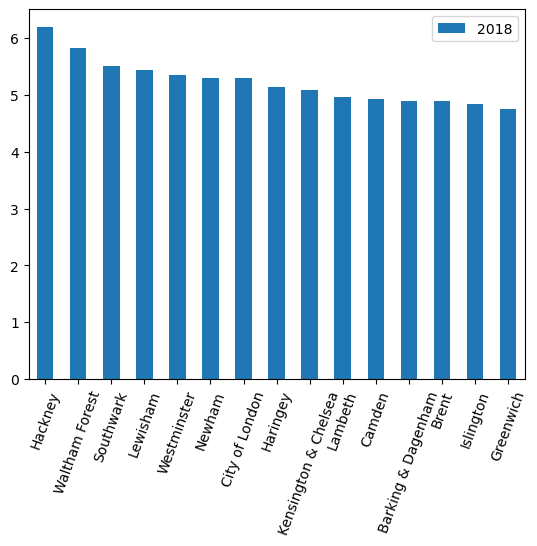

In [122]:
ax = top15[['Borough', '2018']].plot(kind='bar', rot=70)

ax.set_xticklabels(top15.Borough)

In [134]:
new_index = range(1,16)
top15.index = new_index

print(f"Conclusion:\nThe top 15 boroughs that have seen the biggest price increase ratio from 1998 to 2018 are:\n{top15}")

Conclusion:
The top 15 boroughs that have seen the biggest price increase ratio from 1998 to 2018 are:
                 Borough      2018
1                Hackney  6.198286
2         Waltham Forest  5.834756
3              Southwark  5.516485
4               Lewisham  5.449221
5            Westminster  5.353565
6                 Newham  5.305390
7         City of London  5.301620
8               Haringey  5.134625
9   Kensington & Chelsea  5.082465
10               Lambeth  4.957751
11                Camden  4.935353
12    Barking & Dagenham  4.896619
13                 Brent  4.894554
14             Islington  4.844048
15             Greenwich  4.763036
